# <font color='#FFE15D'>**Week 11: Logistic Regression 🔴🔵**</font>

## **🔸 Evaluation Metrics**

In [2]:
from sklearn.datasets import load_iris,make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression, SGDClassifier
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import os

notebook_path = os.getcwd()
data_path = f"{notebook_path}/data/exam.csv"

df = pd.read_csv(data_path)
df.head()

,study_hours,pass_fail
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [4]:
X = df[['study_hours']].values
y = df['pass_fail'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10, 1), (10, 1), (10,), (10,))

In [5]:
model = LogisticRegression(penalty=None,random_state=25)
model.fit(x_train, y_train)

LogisticRegression(penalty=None, random_state=25)

### Threshold

In [6]:
model.predict(x_test)

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [7]:
y_hat = model.predict_proba(x_test)[:, 1]
y_hat

array([0.97725398, 0.88301574, 0.00713979, 0.75983541, 0.08896585,
       0.9998738 , 0.9992821 , 0.00126179, 0.01686708, 0.18895702])

In [8]:
t = 0.2
y_hat < t, y_hat >= t, y_hat[y_hat < t]

(array([False, False,  True, False,  True, False, False,  True,  True,
         True]),
 array([ True,  True, False,  True, False,  True,  True, False, False,
        False]),
 array([0.00713979, 0.08896585, 0.00126179, 0.01686708, 0.18895702]))

In [9]:
t = 0.95
y_hat_binary = y_hat.copy()
y_hat_binary[y_hat < t] = 0
y_hat_binary[y_hat >= t] = 1
y_hat_binary

array([1., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

In [10]:
np.where(y_hat<t, 0, 1)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [11]:
y_hat_binary = np.where(y_hat<t, 0, 1)
y_hat_binary, y_test

(array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64))

#### More on threshold!

(55250, 2) (29750, 2) (15000, 2)
(14875,) (14875,)


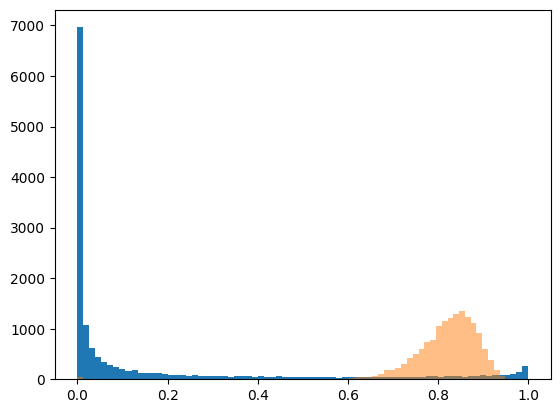

In [12]:
#1
X, y = make_classification(
    n_samples=100000,
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.6,
    random_state=12,
)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15
)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.35
)
print(x_train.shape, x_valid.shape, x_test.shape)

model = LogisticRegression(penalty=None)
model.fit(x_train, y_train)

y_hat = model.predict_proba(x_valid)[:, 1]
negatives = y_hat[y_valid == 0]
positives = y_hat[y_valid == 1]
print(positives.shape, negatives.shape)
plt.hist(negatives, 75);
plt.hist(positives, 75, alpha=0.5);

(55250, 2) (29750, 2) (15000, 2)
(14875,) (14875,)


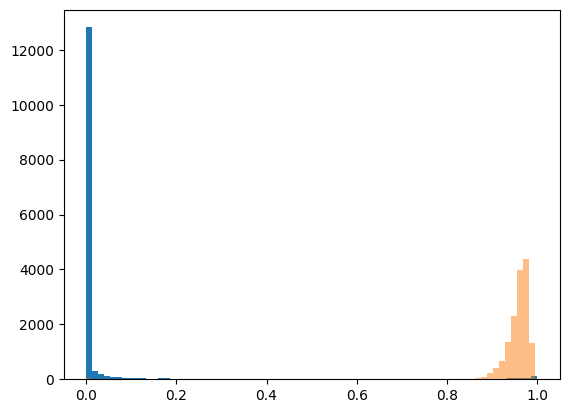

In [13]:
#2
X, y = make_classification(
    n_samples=100000,
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.0,
    random_state=12,
)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15
)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.35
)
print(x_train.shape, x_valid.shape, x_test.shape)

model = LogisticRegression(penalty=None)
model.fit(x_train, y_train)

y_hat = model.predict_proba(x_valid)[:, 1]
negatives = y_hat[y_valid == 0]
positives = y_hat[y_valid == 1]
print(positives.shape, negatives.shape)
plt.hist(negatives, 75);
plt.hist(positives, 75, alpha=0.5);

### TP FP TN FN (from scratch)

In [14]:
# copied form above
X = df[['study_hours']].values
y = df['pass_fail'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

model = LogisticRegression(penalty=None,random_state=25)
model.fit(x_train, y_train)

LogisticRegression(penalty=None, random_state=25)

In [15]:
y_test, y_hat_binary

(array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64),
 array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0]))

In [16]:
(y_hat_binary==1) & (y_test==1)

array([False, False, False, False, False,  True,  True, False, False,
       False])

In [17]:
# True Positives (TP)
tp = np.sum((y_hat_binary==1) & (y_test==1))
tp

2

In [18]:
# False Positives (FP)
fp = np.sum((y_hat_binary==1) & (y_test==0))
fp

1

In [19]:
# True Negatives (TN)
tn = np.sum((y_hat_binary==0) & (y_test==0))
tn

5

In [20]:
# False Negatives (FN)
fn = np.sum((y_hat_binary==0) & (y_test==1))
fn

2

### TP FP TN FN (sklearn)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test, y_hat_binary)
# Be careful about output structure
# Thus in binary classification, the count of true negatives is C_{0,0},
# false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

array([[5, 1],
       [2, 2]], dtype=int64)

### TPR FPR TNR FNR (from scratch)

In [23]:
# True Positive Rate (TPR)
tpr = tp / (tp + fn)

tpr

0.5

In [24]:
# False Positive Rate (FPR)
fpr = fn / (tp + fn)
fpr_for_test = 1 - tpr

fpr, fpr_for_test

(0.5, 0.5)

In [25]:
# True Negative Rate (TNR)
tnr = tn / (tn + fp)

tnr

0.8333333333333334

In [26]:
# False Negative Rate (FNR)
fnr = fp / (tn + fp)
fnr_for_test = 1 - tnr

fnr, fnr_for_test

(0.16666666666666666, 0.16666666666666663)

### Exercise

* #### Train a LogisticRegression model.
* #### Plot the decision boundary and decision region.
* #### Write a function that calculates the {TP, FP, TN, FN} metrics.
* #### Find the {TP, FP, TN, FN} samples and mark them with different colors/shapes in the figure.

In [27]:
# TODO Exercise video 328 4:00
X, y = make_classification(n_samples=10000, n_features=2, n_classes=2,
                           n_redundant=0, n_clusters_per_class=1, class_sep=1.,
                           random_state=12)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### ROC Curve (from scratch)

In [28]:
model = LogisticRegression(penalty=None)
model.fit(x_train, y_train)
y_hat = model.predict_proba(x_test)[:, 1]

Text(0, 0.5, 'TPR')

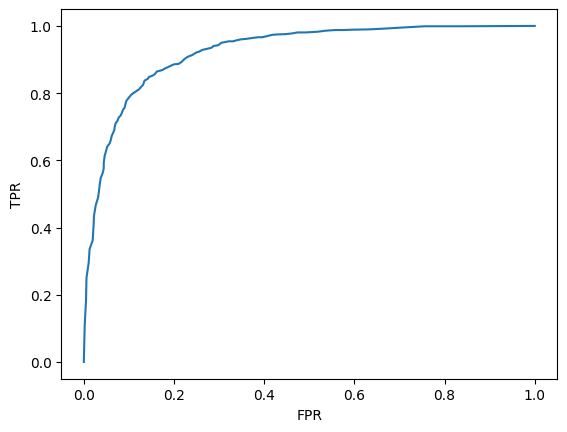

In [29]:
t = np.linspace(0, 1, 100)

tpr, fpr = [], []
for ti in t:
    y_hati = np.where(y_hat<ti, 0, 1)
    tn, fp, fn, tp = confusion_matrix(y_test, y_hati).ravel()
    tpri = tp / (tp + fn)
    fpri = fp / (fp + tn)
    tpr.append(tpri)
    fpr.append(fpri)
    
tpr = np.array(tpr)
fpr = np.array(fpr)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

### ROC Curve (sklearn)

In [30]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
fpr.shape, tpr.shape, thresholds.shape

((428,), (428,), (428,))

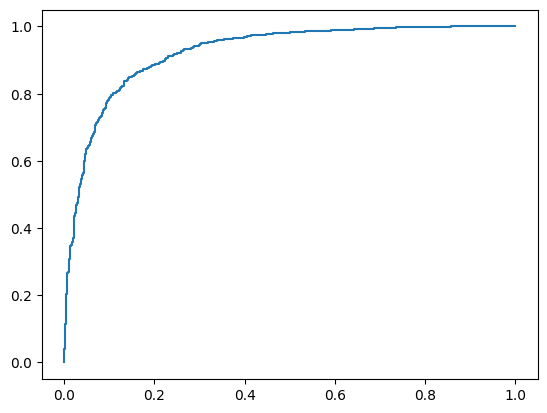

In [32]:
plt.plot(fpr, tpr)

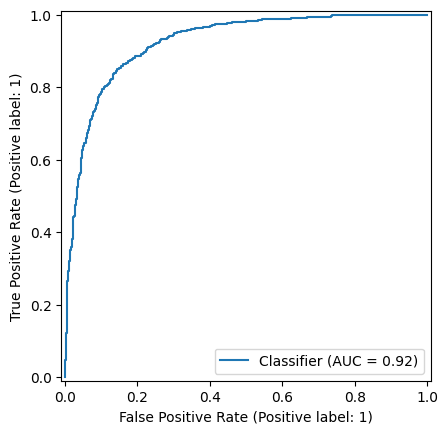

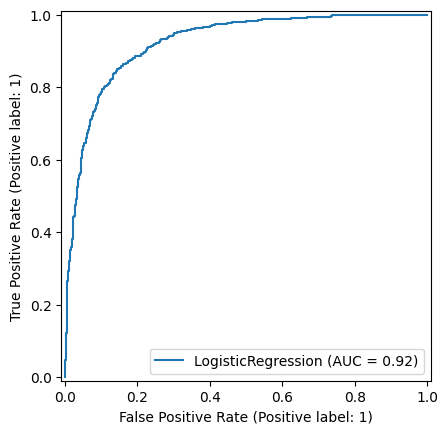

In [33]:
RocCurveDisplay.from_predictions(y_test, y_hat)
RocCurveDisplay.from_estimator(model, x_test, y_test)

In [34]:
roc_auc_score(y_test, y_hat)

0.9235484009727511

### Precision & Recall (sklearn)

In [35]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, average_precision_score, PrecisionRecallDisplay, f1_score

In [ ]:
t = 0.5
y_hat_binary = np.where(y_hat<t, 0, 1)
precision_score(y_test,  )

0.8379721669980119

In [37]:
recall_score(y_test, y_hat_binary)

0.8593272171253823

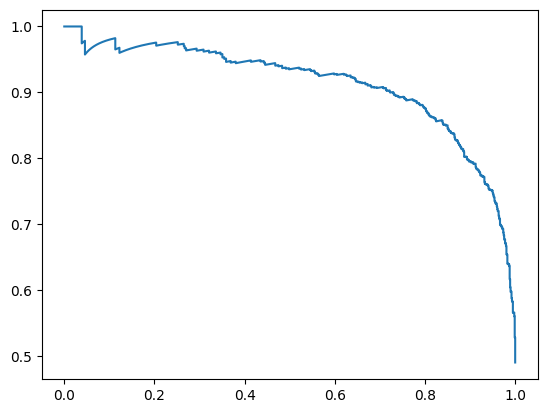

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test, y_hat)
plt.plot(recall, precision)

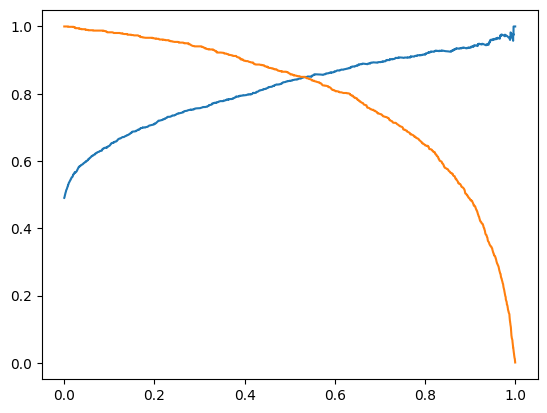

In [39]:
plt.plot(thresholds, precision[:-1])
plt.plot(thresholds, recall[:-1])

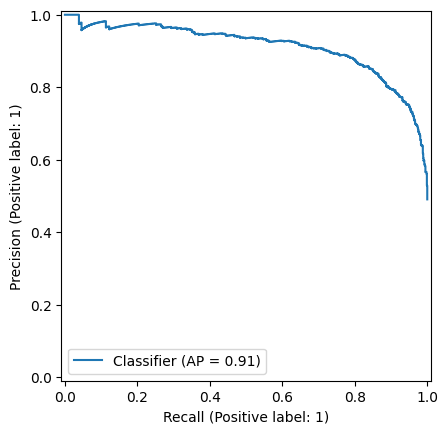

In [40]:
PrecisionRecallDisplay.from_predictions(y_test, y_hat)

In [41]:
average_precision_score(y_test, y_hat)

0.9127069030037288

In [42]:
f1_score(y_test, y_hat_binary)

0.8485153497735279

### Confusion Matrix (sklearn)

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [44]:
X, y = load_iris(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [45]:
model = LogisticRegression(penalty=None)
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
y_hat

array([0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 1])

In [46]:
confusion_matrix(y_test, y_hat)

array([[ 8,  1,  0],
       [ 0, 13,  0],
       [ 0,  1,  7]], dtype=int64)

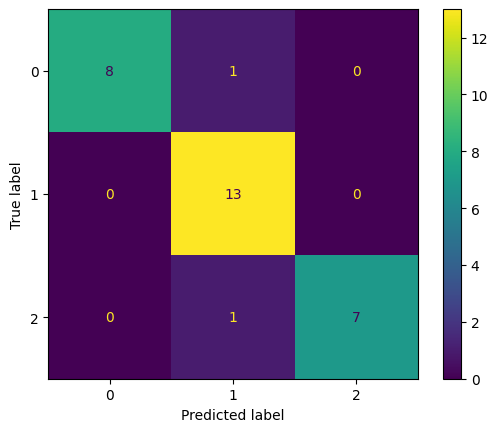

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

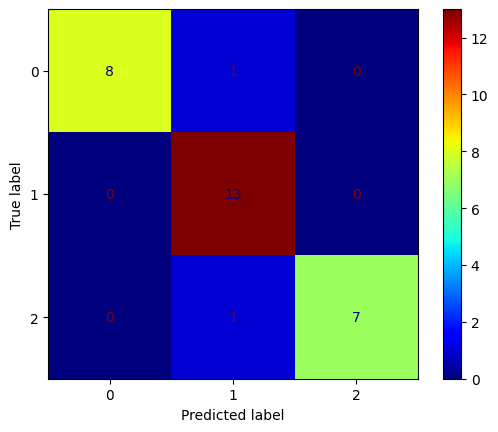

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, cmap='jet')

In [50]:
precision_score(y_test, y_hat, average=None)

array([1.        , 0.86666667, 1.        ])

In [52]:
precision_score(y_test, y_hat, average='micro')

0.9333333333333333

In [54]:
precision_score(y_test, y_hat, average='macro')

0.9555555555555556

In [55]:
precision_score(y_test, y_hat, average='weighted')

0.9422222222222222

- Class A: 
   - True Positives (TP): 10
   - False Positives (FP): 2

- Class B: 
   - TP: 15
   - FP: 1

- Class C: 
   - TP: 12
   - FP: 3

--------------
### 1. Micro

- Total TP: 10 + 15 + 12 = 37
- Total FP: 2 + 1 + 3 = 6

- Precision = TP / (TP + FP) = 37 / (37 + 6) ≈ 0.860

----------------
### 2. Macro

For Class A:
- Precision = TP / (TP + FP) = 10 / (10 + 2) ≈ 0.833

For Class B:
- Precision = TP / (TP + FP) = 15 / (15 + 1) ≈ 0.938

For Class C:
- Precision = TP / (TP + FP) = 12 / (12 + 3) ≈ 0.800


- Average Precision = (0.833 + 0.938 + 0.800) / 3 ≈ 0.857

-----------------------------
### 3. Weighted:

- Class A: 50 samples
- Class B: 100 samples
- Class C: 75 samples


- Weighted Average Precision = (0.833 * 50 + 0.938 * 100 + 0.800 * 75) / (50 + 100 + 75) ≈ 0.872

-----------------------
### In summary:

- Micro-Averaged Precision: 0.860
- Macro-Averaged Precision: 0.857
- Weighted-Averaged Precision: 0.872